In [ ]:
%%bash
source /usr/local/gromacs/bin/GMXRC

# GROUP 16 is the Backbone
####################### RMSD 4ZW9
for item in 4zw9 4zw9_asp89 4zw9_trp331
do
    # RSMD
    for i in 1 2 3
    do
    tpr_file=${item}/rep${i}/step7_production_rep${i}.tpr
    xtc_file=${item}/rep${i}/step7_production_rep${i}.xtc
    if [ ! -f ${tpr_file} ]; then
        echo "File ${tpr_file} does not exist. Continuing with next file."
        continue
    fi
    printf "BB BB" | gmx rms \
        -s ${tpr_file} \
        -f ${xtc_file} \
        -n ${item}/index.bb.ndx \
        -o rmsd/${item}_rep${i}.xvg
    done
done

####################### RMSD 5EQI
for item in 5eqi 5eqi_asp91 5eqi_trp333
do
    # RSMD
    for i in 1 2 3
    do
    tpr_file=${item}/rep${i}/step7_production_rep${i}.tpr
    xtc_file=${item}/rep${i}/step7_production_rep${i}.xtc
    if [ ! -f ${tpr_file} ]; then
        echo "File ${tpr_file} does not exist. Continuing with next file."
        continue
    fi
    printf "BB BB" | gmx rms \
        -s ${tpr_file} \
        -f ${xtc_file} \
        -n ${item}/index.bb.ndx \
        -o rmsd/${item}_rep${i}.xvg
    done
done

# NEW STUFF

In [5]:
import os
import numpy as np
import pandas as pd

dir_names = "4zw9 4zw9_asp89 4zw9_trp331 5eqi 5eqi_asp91 5eqi_trp333".split(" ")
label_names = dir_names
names = dict(zip(dir_names, label_names))
    

rmsd_dataset = []
for protein in dir_names:
    structure = protein[0:4]
    for i in range(3):
        path = f"rmsd/" + f"{protein}_rep{i+1}.xvg"
        if not os.path.isfile(path):
            print(f"{path} not found. Continue.")
            continue

        x, y = np.loadtxt(path, comments=["@", "#"], unpack=True)
        for x_item, y_item in zip(x, y):
            rmsd_dataset.append({"protein"  : protein,
                                 "structure": structure,
                                 "rep"      : str(i+1),
                                 "time"     : x_item,
                                 "rmsd"     : y_item,
                                    })


rmsd_dataset_df = pd.DataFrame(rmsd_dataset)
rmsd_dataset_df

,protein,structure,rep,time,rmsd
0,4zw9,4zw9,1,0.0,0.004882
1,4zw9,4zw9,1,200.0,0.109106
2,4zw9,4zw9,1,400.0,0.140277
3,4zw9,4zw9,1,600.0,0.159445
4,4zw9,4zw9,1,800.0,0.151014
...,...,...,...,...,...
4026097,5eqi_trp333,5eqi,3,44082600.0,0.221186
4026098,5eqi_trp333,5eqi,3,44082800.0,0.223526
4026099,5eqi_trp333,5eqi,3,44083000.0,0.221239
4026100,5eqi_trp333,5eqi,3,44083200.0,0.218148


<Axes: xlabel='protein', ylabel='rmsd'>

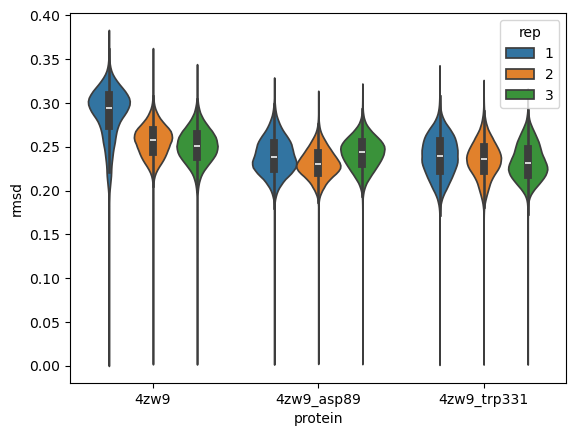

In [6]:
import seaborn as sns
struc1 = rmsd_dataset_df[rmsd_dataset_df['structure'] == "4zw9"]
sns.violinplot(data=struc1, x='protein', y='rmsd', hue='rep')

<Axes: xlabel='protein', ylabel='rmsd'>

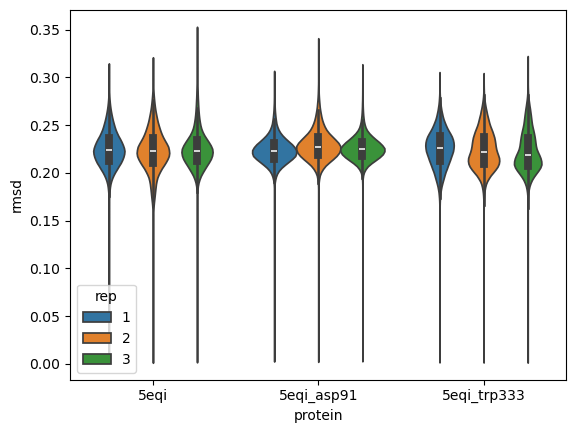

In [7]:
import seaborn as sns
struc1 = rmsd_dataset_df[rmsd_dataset_df['structure'] == "5eqi"]
sns.violinplot(data=struc1, x='protein', y='rmsd', hue='rep')

<Axes: xlabel='protein', ylabel='rmsd'>

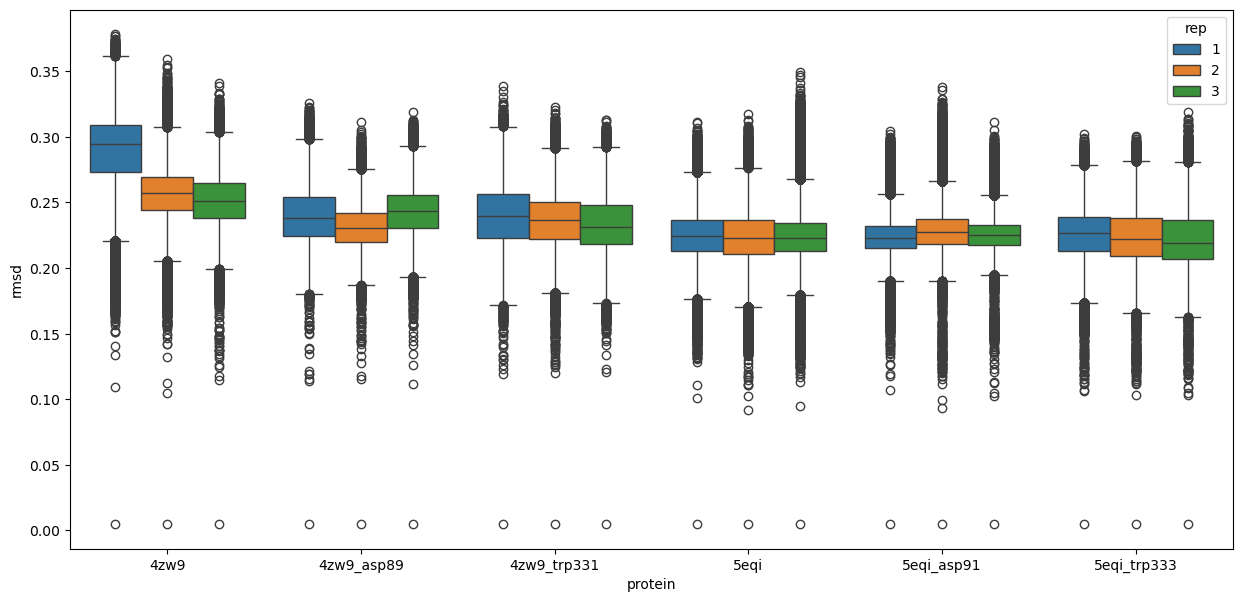

In [40]:
sns.boxplot(data=rmsd_dataset_df, x='protein', y='rmsd', hue='rep')

<Figure size 1500x700 with 0 Axes>

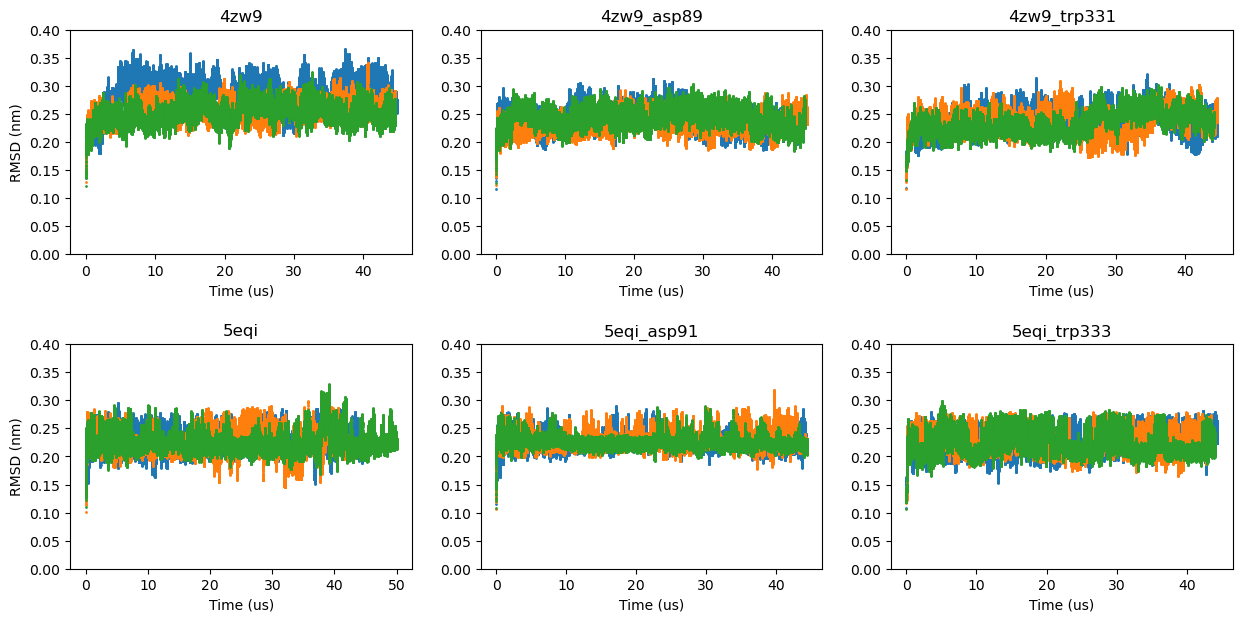

<Figure size 1500x700 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def sliding_window_average(x, y, window_size):
    x = np.array(x)
    y = np.array(y)
    weights = np.repeat(1.0, window_size) / window_size
    y_avg = np.convolve(y, weights, 'valid')
    x_avg = np.convolve(x, weights, 'valid')
    return x_avg, y_avg

dir_names = "4zw9 4zw9_asp89 4zw9_trp331 5eqi 5eqi_asp91 5eqi_trp333".split(" ")
label_names = dir_names
names = dict(zip(dir_names, label_names))

fig, axs = plt.subplots(2, 3)
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.2)
plt.rcParams["figure.figsize"] = (15,7)

xpos, ypos = 0, 0
for protnr, protein in enumerate(dir_names):
    for i in range(0, 3):
        x, y = np.loadtxt(f"rmsd/{protein}_rep{i+1}.xvg",comments=["@", "#"],unpack=True)
        x, y = sliding_window_average(x, y, 10)
        x /= 1e6 # ns
        
        axs[ypos][xpos].scatter(x, y,s=1, )
        if xpos == 0:
            axs[ypos][xpos].set_ylabel("RMSD (nm)")
        axs[ypos][xpos].set_xlabel("Time (us)")
        axs[ypos][xpos].set_title(protein)
        axs[ypos][xpos].set_ylim((0, 0.4))
    xpos += 1
    if xpos == 3:
        ypos += 1
        xpos =  0

plt.figure()

<Figure size 1500x700 with 0 Axes>

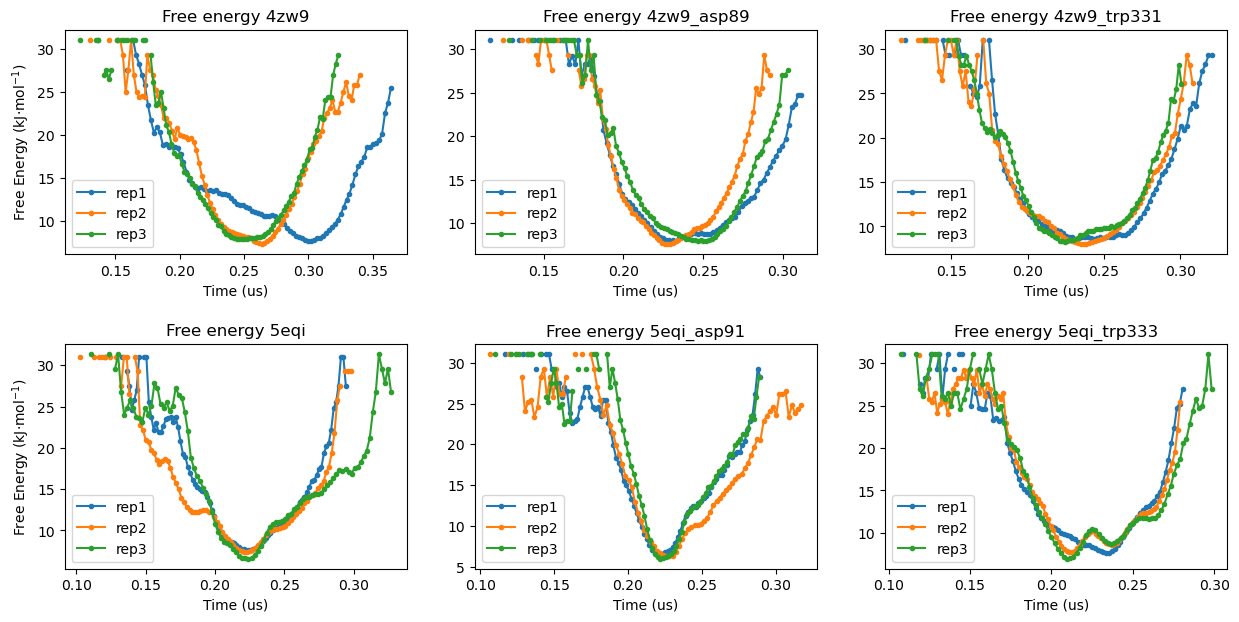

<Figure size 1500x700 with 0 Axes>

In [71]:
import matplotlib.pyplot as plt
import numpy as np

def sliding_window_average(x, y, window_size):
    x = np.array(x)
    y = np.array(y)
    weights = np.repeat(1.0, window_size) / window_size
    y_avg = np.convolve(y, weights, 'valid')
    x_avg = np.convolve(x, weights, 'valid')
    return x_avg, y_avg

dir_names = "4zw9 4zw9_asp89 4zw9_trp331 5eqi 5eqi_asp91 5eqi_trp333".split(" ")
label_names = dir_names
names = dict(zip(dir_names, label_names))

fig, axs = plt.subplots(2, 3)
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.2)
plt.rcParams["figure.figsize"] = (15,7)

xpos, ypos = 0, 0
for protnr, protein in enumerate(dir_names):
    for i in range(0, 3):
        x, y = np.loadtxt(f"rmsd/{protein}_rep{i+1}.xvg",comments=["@", "#"],unpack=True)
        x, y = sliding_window_average(x, y, 10)
        x /= 1e6 # ns
        
        y_hist,binEdges=np.histogram(y,bins=100)
        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        p = y_hist/float(y_hist.sum())
        p[p==0] = None

        # Joule/Kelvin
        k_b = 1.380649*(10**(-23))
        T = 303.15 # Kelvin

        # Free energy:
        avagadro = 6.022 * 10 ** 23       
        energy = -(k_b * T * np.log(p)) 

        # energy to kilojoule per mol:
        # kilo = 1000
        fe = energy * avagadro / 1000


        axs[ypos][xpos].plot(bincenters, fe,'-', marker=".")
        if xpos == 0:
            axs[ypos][xpos].set_ylabel(r"Free Energy (kJ$\cdot$mol$^{-1}$)")
        axs[ypos][xpos].set_xlabel("Time (us)")
        axs[ypos][xpos].set_title(f"Free energy {protein}")
        axs[ypos][xpos].legend(["rep1", "rep2", "rep3"])


        # axs[ypos][xpos].set_ylim((0, 0.4))
    xpos += 1
    if xpos == 3:
        ypos += 1
        xpos =  0

plt.figure()

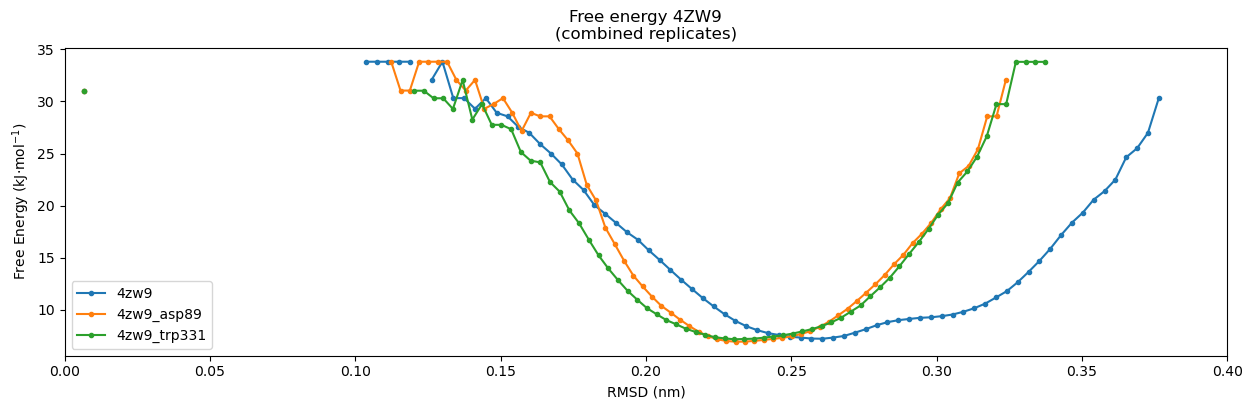

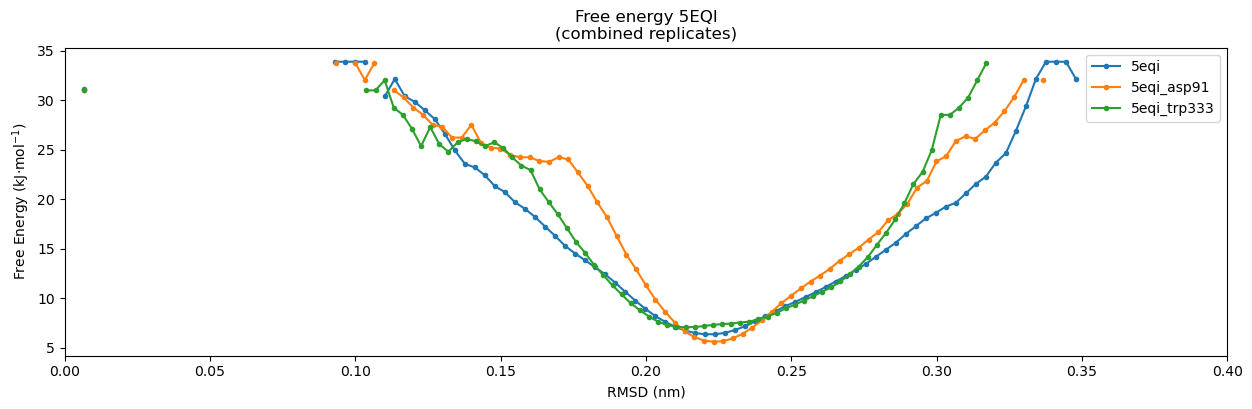

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def sliding_window_average(x, y, window_size):
    x = np.array(x)
    y = np.array(y)
    weights = np.repeat(1.0, window_size) / window_size
    y_avg = np.convolve(y, weights, 'valid')
    x_avg = np.convolve(x, weights, 'valid')
    return x_avg, y_avg



fig, axs = plt.subplots(1, 1)
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.2)
plt.rcParams["figure.figsize"] = (15,4)

dir_names = "4zw9 4zw9_asp89 4zw9_trp331 5eqi 5eqi_asp91 5eqi_trp333".split(" ")

for protnr, protein in enumerate(dir_names[0:3]):
    x_all = []
    y_all = []
    for i in range(0, 3):
        x, y = np.loadtxt(f"rmsd/{protein}_rep{i+1}.xvg",comments=["@", "#"],unpack=True)
        # x, y = sliding_window_average(x, y, 10)
        x /= 1e6 # ns
            # y *= 10  # nm to angstrom
        
        x_all.extend(x)
        y_all.extend(y)

    y_hist,binEdges=np.histogram(y_all,bins=100)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    p = y_hist/float(y_hist.sum())
    p[p==0] = None

    # Joule/Kelvin
    k_b = 1.380649*(10**(-23))
    T = 303.15 # Kelvin

    # Free energy:
    avagadro = 6.022 * 10 ** 23       
    energy = -(k_b * T * np.log(p)) 

    # energy to kilojoule per mol:
    # kilo = 1000
    fe = energy * avagadro / 1000

    axs.plot(bincenters, fe,'-', marker=".")
    axs.set_xlabel("RMSD (nm)") 
    axs.set_ylabel(r"Free Energy (kJ$\cdot$mol$^{-1}$)")
    axs.set_title(f"Free energy 4ZW9\n(combined replicates)")
    axs.set_xlim((0, 0.4))
axs.legend(dir_names[0:3])

fig, axs = plt.subplots(1, 1)
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.2)
plt.rcParams["figure.figsize"] = (15,4)

for protnr, protein in enumerate(dir_names[3:6]):
    x_all = []
    y_all = []
    for i in range(0, 3):
        x, y = np.loadtxt(f"rmsd/{protein}_rep{i+1}.xvg",comments=["@", "#"],unpack=True)
        # x, y = sliding_window_average(x, y, 10)
        x /= 1e6 # ns
            # y *= 10  # nm to angstrom
        
        x_all.extend(x)
        y_all.extend(y)

    y_hist,binEdges=np.histogram(y_all,bins=100)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    p = y_hist/float(y_hist.sum())
    p[p==0] = None

    # Joule/Kelvin
    k_b = 1.380649*(10**(-23))
    T = 303.15 # Kelvin

    # Free energy:
    avagadro = 6.022 * 10 ** 23       
    energy = -(k_b * T * np.log(p)) 

    # energy to kilojoule per mol:
    # kilo = 1000
    fe = energy * avagadro / 1000

    axs.plot(bincenters, fe,'-', marker=".")
    axs.set_xlabel("RMSD (nm)") 
    axs.set_ylabel(r"Free Energy (kJ$\cdot$mol$^{-1}$)")
    axs.set_title(f"Free energy 5EQI\n(combined replicates)")
    axs.set_xlim((0, 0.4))
axs.legend(dir_names[3:6])
